Python Project S&P 500 

In [7]:
import numpy as np 
import pandas as pd 
from pylab import mpl, plt 

In [8]:
import csv 

In [9]:
# imports S&P 500 data from 2000-2024

df= pd.read_csv('bro.csv')

In [10]:
# removes uncessary columns other than 'Close' Column'

clipped = df.drop(['Open','High','Low','Adj Close Adjusted close price adjusted for splits and dividend and/or capital gain distributions.','Volume'], axis=1)

In [11]:
print(clipped)



              Date Close Close price adjusted for splits.
0     Jul 12, 2024                               5,615.35
1     Jul 11, 2024                               5,584.54
2     Jul 10, 2024                               5,633.91
3      Jul 9, 2024                               5,576.98
4      Jul 8, 2024                               5,572.85
...            ...                                    ...
6165   Jan 7, 2000                               1,441.47
6166   Jan 6, 2000                               1,403.45
6167   Jan 5, 2000                               1,402.11
6168   Jan 4, 2000                               1,399.42
6169   Jan 3, 2000                               1,455.22

[6170 rows x 2 columns]


In [12]:
# Fixes string input error for 'Close' Column 

clipped = clipped.rename(columns={'Close Close price adjusted for splits.':'Close'})

In [13]:
clipped['Close']

0       5,615.35
1       5,584.54
2       5,633.91
3       5,576.98
4       5,572.85
          ...   
6165    1,441.47
6166    1,403.45
6167    1,402.11
6168    1,399.42
6169    1,455.22
Name: Close, Length: 6170, dtype: object

In [14]:
# convert Date Column to Date Time, (shows Traceback and error because 'Date' Column is now index)

clipped['Date'] = pd.to_datetime(clipped['Date'])

In [15]:
# Sets the Index as the 'Date' Column for a Date Time Index 

clipped.set_index('Date', inplace=True)

In [16]:
print(clipped)

               Close
Date                
2024-07-12  5,615.35
2024-07-11  5,584.54
2024-07-10  5,633.91
2024-07-09  5,576.98
2024-07-08  5,572.85
...              ...
2000-01-07  1,441.47
2000-01-06  1,403.45
2000-01-05  1,402.11
2000-01-04  1,399.42
2000-01-03  1,455.22

[6170 rows x 1 columns]


In [17]:
# removes commas from string data 

clipped = clipped.replace(",",'', regex=True)

In [18]:
# changes Close Column to Float so it can be visualized as numerical data

clipped['Close'] = clipped['Close' ].astype(float)

In [19]:
# Creates Columns for Daily Returns described as percent change from previous days close which will later be adjusted accordingly or percentage formatting 

clipped['Daily Returns as %'] = clipped['Close' ].astype(float).pct_change(-1) 

In [20]:
print(clipped)

              Close  Daily Returns as %
Date                                   
2024-07-12  5615.35            0.005517
2024-07-11  5584.54           -0.008763
2024-07-10  5633.91            0.010208
2024-07-09  5576.98            0.000741
2024-07-08  5572.85            0.001017
...             ...                 ...
2000-01-07  1441.47            0.027090
2000-01-06  1403.45            0.000956
2000-01-05  1402.11            0.001922
2000-01-04  1399.42           -0.038345
2000-01-03  1455.22                 NaN

[6170 rows x 2 columns]


In [21]:
clipped.head()

,Close,Daily Returns as %
Date,,
2024-07-12,5615.35,0.005517
2024-07-11,5584.54,-0.008763
2024-07-10,5633.91,0.010208
2024-07-09,5576.98,0.000741
2024-07-08,5572.85,0.001017


In [22]:
#rounds large decimal float 

decimals = 4 
clipped['Daily Returns as %'] = clipped['Daily Returns as %'].apply(lambda x: round(x,decimals))
clipped['Daily Returns as %'] = clipped['Daily Returns as %'] * 100

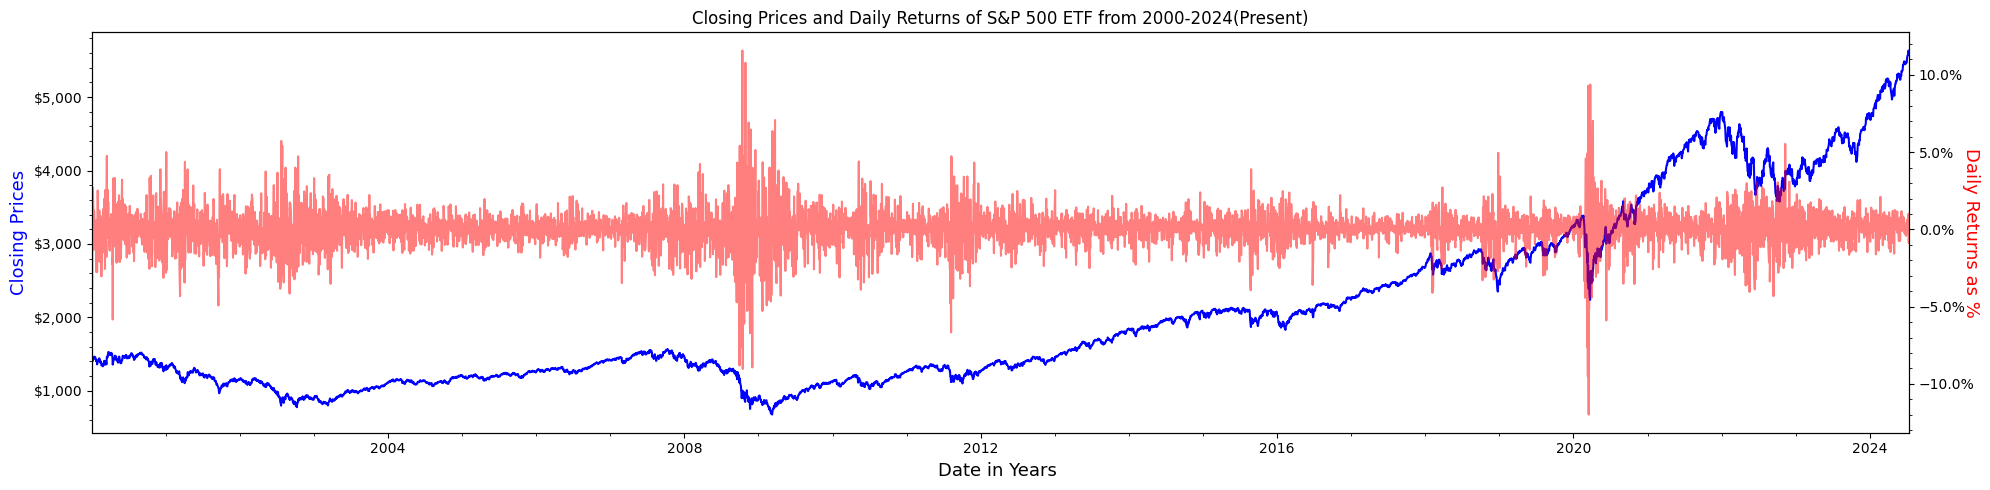

In [23]:
import matplotlib.pyplot as plt 
import matplotlib.dates 
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator,FormatStrFormatter)
import matplotlib.ticker as mtick
from pylab import rcParams


# sets subplots and figure size 

fig, ax1 = plt.subplots()

fig.set_figheight(5)
fig.set_figwidth(20)

plt.title("Closing Prices and Daily Returns of S&P 500 ETF from 2000-2024(Present)")

# sets x-Axis and formats

Years = clipped.index

ax1.xaxis.set_minor_locator(AutoMinorLocator())

ax1.set_xlabel('Date in Years ', fontsize = 13 )

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick) 


# sets Y values

Closing = clipped['Close']

Returns = clipped['Daily Returns as %']

ax1.xaxis.set_minor_locator(AutoMinorLocator())

#plots subplots and formats

ax2 = ax1.twinx()

ax1.plot(Years, Closing , color = 'b')

ax1.set_ylabel('Closing Prices', color = 'b',fontsize = 13)

ax1.yaxis.set_minor_locator(AutoMinorLocator())


ax2.plot(Years, Returns, color = 'r', alpha = .5)

ax2.set_ylabel('Daily Returns as %', color = 'r', rotation = 270,fontsize = 13)

ax2.yaxis.set_minor_locator(AutoMinorLocator())



ax2.yaxis.set_major_formatter(mtick.PercentFormatter())


plt.margins(x=0)

# shows plot
plt.tight_layout()
plt.show()

Initial Price: 1455.22
Final Price: 5615.35
Percent change from beginning to end: 285.88%


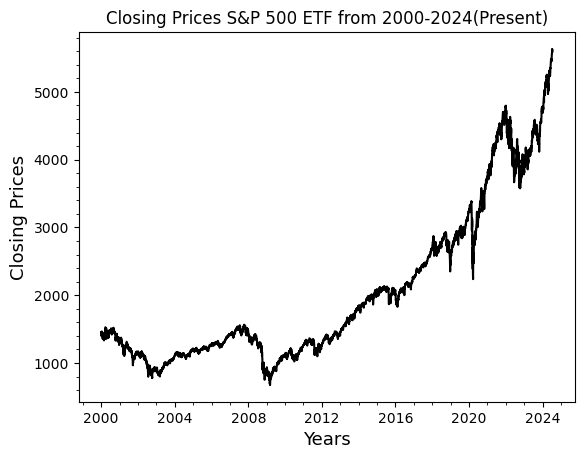

In [24]:

#plot Historical Closing Prices from 2000-2024 in a line plot 

plt.plot(Years,Closing, color = 'black')

plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())

plt.ylabel('Closing Prices',fontsize = 13)

plt.xlabel('Years',fontsize = 13)

plt.title("Closing Prices S&P 500 ETF from 2000-2024(Present)")

initial_price = Closing.iloc[-1]
final_price = Closing.iloc[0]
percent_change = ((final_price - initial_price) / initial_price) * 100

print(f"Initial Price: {initial_price:.2f}")
print(f"Final Price: {final_price:.2f}")
print(f"Percent change from beginning to end: {percent_change:.2f}%")

plt.show()

In [26]:
clipped['30 day Mean of Daily Returns %'] = clipped['Daily Returns as %'].rolling(30).mean()

In [27]:
print(clipped)

              Close  Daily Returns as %  30 day Mean of Daily Returns %
Date                                                                   
2024-07-12  5615.35                0.55                             NaN
2024-07-11  5584.54               -0.88                             NaN
2024-07-10  5633.91                1.02                             NaN
2024-07-09  5576.98                0.07                             NaN
2024-07-08  5572.85                0.10                             NaN
...             ...                 ...                             ...
2000-01-07  1441.47                2.71                       -0.129333
2000-01-06  1403.45                0.10                       -0.024667
2000-01-05  1402.11                0.19                       -0.019667
2000-01-04  1399.42               -3.83                       -0.113000
2000-01-03  1455.22                 NaN                             NaN

[6170 rows x 3 columns]


In [28]:
clipped['30 day Std of Daily Returns %'] = clipped['Daily Returns as %'].rolling(30).std()

In [29]:
print (clipped)

              Close  Daily Returns as %  30 day Mean of Daily Returns %  \
Date                                                                      
2024-07-12  5615.35                0.55                             NaN   
2024-07-11  5584.54               -0.88                             NaN   
2024-07-10  5633.91                1.02                             NaN   
2024-07-09  5576.98                0.07                             NaN   
2024-07-08  5572.85                0.10                             NaN   
...             ...                 ...                             ...   
2000-01-07  1441.47                2.71                       -0.129333   
2000-01-06  1403.45                0.10                       -0.024667   
2000-01-05  1402.11                0.19                       -0.019667   
2000-01-04  1399.42               -3.83                       -0.113000   
2000-01-03  1455.22                 NaN                             NaN   

            30 day Std o

In [30]:
clipped['30 day Median of Daily Returns %'] = clipped['Daily Returns as %'].rolling(30).median()

In [31]:
print(clipped)

              Close  Daily Returns as %  30 day Mean of Daily Returns %  \
Date                                                                      
2024-07-12  5615.35                0.55                             NaN   
2024-07-11  5584.54               -0.88                             NaN   
2024-07-10  5633.91                1.02                             NaN   
2024-07-09  5576.98                0.07                             NaN   
2024-07-08  5572.85                0.10                             NaN   
...             ...                 ...                             ...   
2000-01-07  1441.47                2.71                       -0.129333   
2000-01-06  1403.45                0.10                       -0.024667   
2000-01-05  1402.11                0.19                       -0.019667   
2000-01-04  1399.42               -3.83                       -0.113000   
2000-01-03  1455.22                 NaN                             NaN   

            30 day Std o

In [32]:
print(clipped)

              Close  Daily Returns as %  30 day Mean of Daily Returns %  \
Date                                                                      
2024-07-12  5615.35                0.55                             NaN   
2024-07-11  5584.54               -0.88                             NaN   
2024-07-10  5633.91                1.02                             NaN   
2024-07-09  5576.98                0.07                             NaN   
2024-07-08  5572.85                0.10                             NaN   
...             ...                 ...                             ...   
2000-01-07  1441.47                2.71                       -0.129333   
2000-01-06  1403.45                0.10                       -0.024667   
2000-01-05  1402.11                0.19                       -0.019667   
2000-01-04  1399.42               -3.83                       -0.113000   
2000-01-03  1455.22                 NaN                             NaN   

            30 day Std o

In [33]:
clipped['Correlation of Daily Returns']= clipped['Daily Returns as %'].rolling(30).corr()


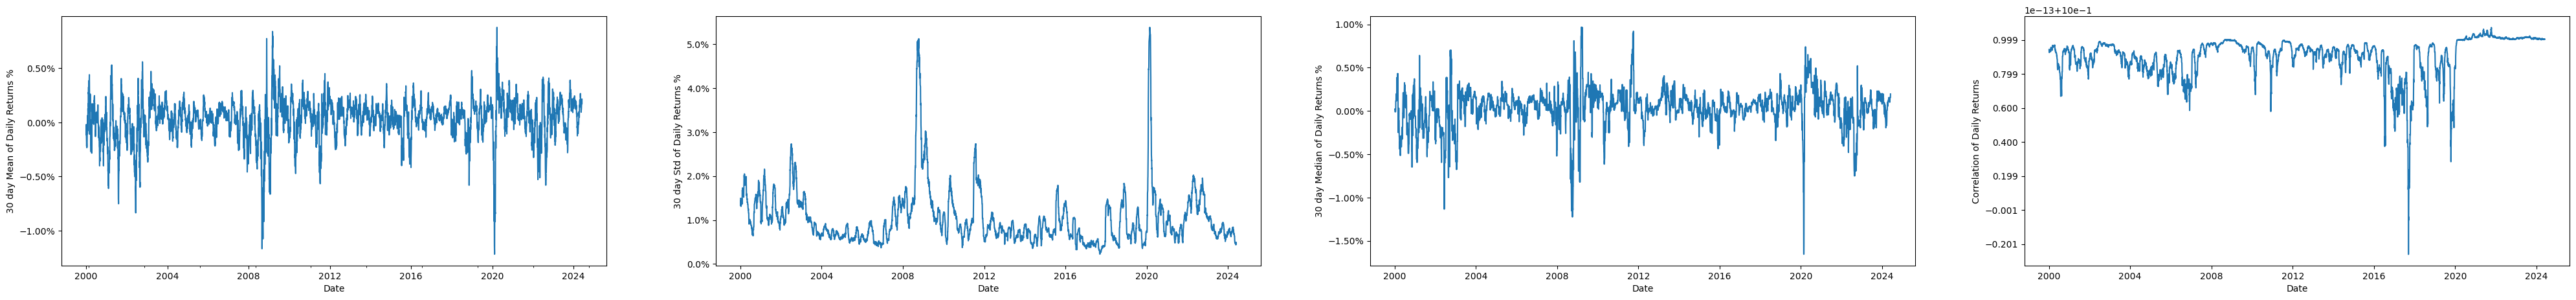

In [37]:
import seaborn as sns 
import scipy as sp


#creates visualizations of 30-day period metrics 

fig, ax = plt.subplots(1,4, figsize=(50,5))




sns.lineplot(ax=ax[0],x = clipped.index , y = clipped['30 day Mean of Daily Returns %'],) 


sns.lineplot(ax=ax[ 1], x = clipped.index , y = clipped['30 day Std of Daily Returns %']) 

sns.lineplot(ax=ax[2],x = clipped.index , y = clipped['30 day Median of Daily Returns %']) 

sns.lineplot(ax=ax[3],x=clipped.index, y = clipped['Correlation of Daily Returns'])

ax[0].yaxis.set_major_formatter(mtick.PercentFormatter())

ax[1].yaxis.set_major_formatter(mtick.PercentFormatter())

ax[2].yaxis.set_major_formatter(mtick.PercentFormatter())

ax[0].xaxis.set_minor_locator(MultipleLocator(1000))


plt.show()



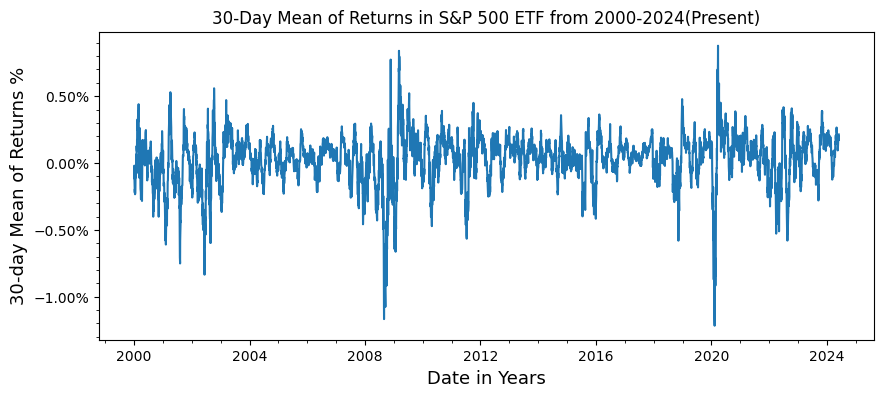

In [38]:


# creates seperate Plot of Rolling 30 Day Mean 

plt.figure(figsize=(10,4))

ax = plt.gca()

y1 = clipped['30 day Mean of Daily Returns %']

plt.plot( clipped.index, y1 )


ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.set_xlabel('Date in Years', fontsize = 13)



ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_ylabel('30-day Mean of Returns %', fontsize = 13)


plt.title('30-Day Mean of Returns in S&P 500 ETF from 2000-2024(Present)')

plt.margins(x=.05)


plt.show()

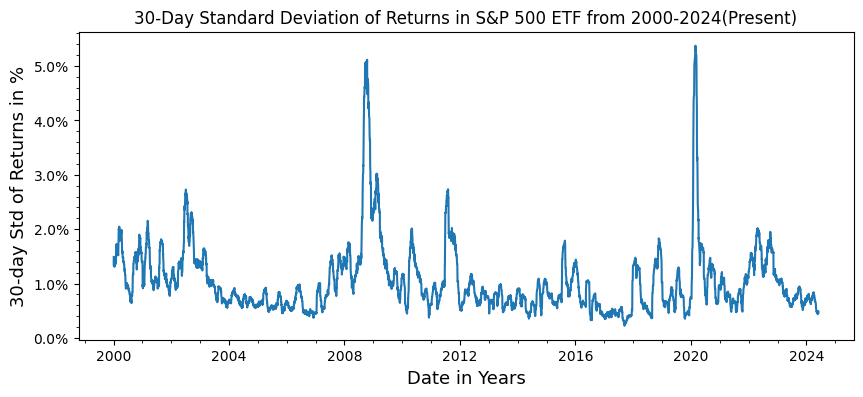

In [39]:

# creates seperate Plot of Rolling 30 Day standard deviation 


plt.figure(figsize=(10,4))

ax = plt.gca()

y2 = clipped['30 day Std of Daily Returns %']

plt.plot( clipped.index, y2 )


ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.set_xlabel('Date in Years', fontsize = 13)



ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_ylabel('30-day Std of Returns in %', fontsize = 13)


plt.title('30-Day Standard Deviation of Returns in S&P 500 ETF from 2000-2024(Present)')

plt.margins(x=.05)


plt.show()

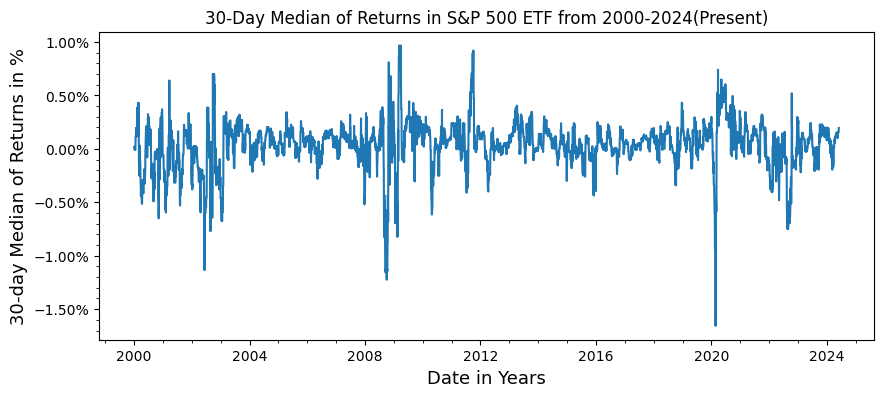

In [40]:

# creates seperate Plot of Rolling 30 Day Median 



plt.figure(figsize=(10,4))

ax = plt.gca()

y3 = clipped['30 day Median of Daily Returns %']

plt.plot( clipped.index, y3 )


ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.set_xlabel('Date in Years', fontsize = 13)



ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_ylabel('30-day Median of Returns in %', fontsize = 13)


plt.title('30-Day Median of Returns in S&P 500 ETF from 2000-2024(Present)')

plt.margins(x=.05)


plt.show()

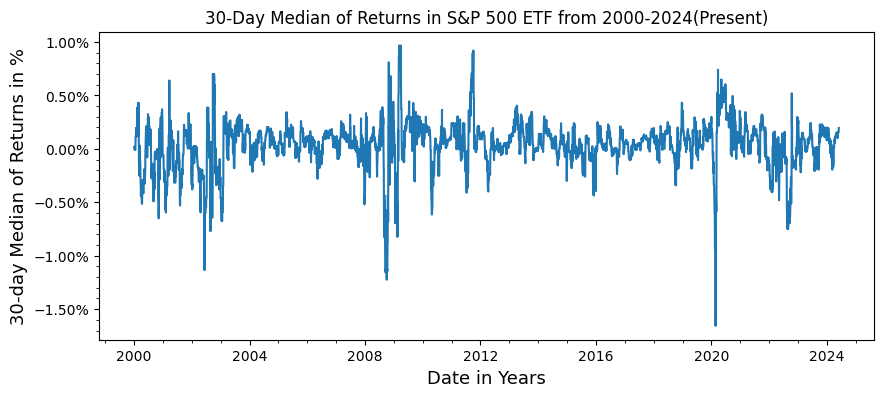

In [41]:


# creates seperate Plot of Rolling 30 Day Median 



plt.figure(figsize=(10,4))



ax = plt.gca()

y4 = clipped['Correlation of Daily Returns']

plt.plot( clipped.index, y3 )


ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.set_xlabel('Date in Years', fontsize = 13)



ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_ylabel('30-day Median of Returns in %', fontsize = 13)


plt.title('30-Day Median of Returns in S&P 500 ETF from 2000-2024(Present)')

plt.margins(x=.05)


plt.show()

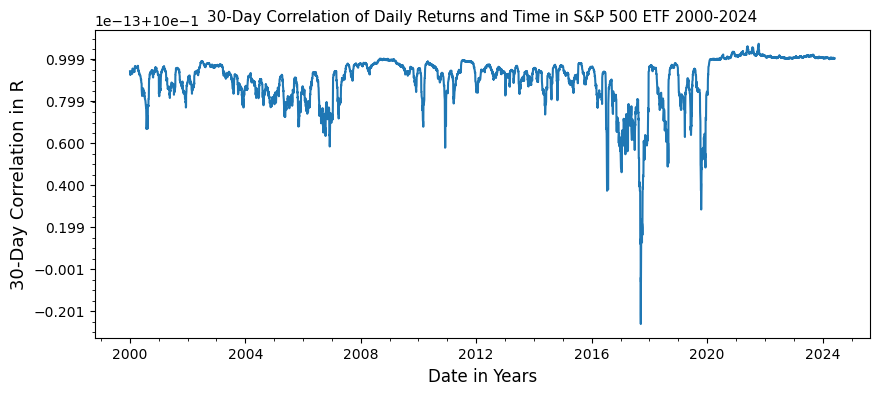

In [42]:



# creates separate Plot of Rolling 30 Day Correlation of Daily Returns and Time 




plt.figure(figsize=(10,4))

ax = plt.gca()

y5 = clipped['Correlation of Daily Returns']

plt.plot( clipped.index, y5 )


ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.set_xlabel('Date in Years', fontsize = 12)



ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.set_ylabel('30-Day Correlation in R', fontsize = 13)


plt.title('30-Day Correlation of Daily Returns and Time in S&P 500 ETF 2000-2024', fontsize = 10.9)

plt.margins(x=.05)


plt.show()

In [43]:
M = 100

I = 10000

# use maximum and minimum daily return percent change to set minimum and maximum values, Set as a uniform distribution using min and max of daily return %  (maybe also set as its own weight) and use normal distribution to then simulate it 10,000 times to plot distribution, refer to youtube video for  guiding 


clipped['Daily Returns as %'].max()


11.58

In [44]:
clipped['Daily Returns as %'].min()


-11.98

In [45]:
%pip install seaborn


In [46]:
# trial simulation



sims = 100000

A = np.random.normal(-11.98, 11.58, sims)

Duration = A 

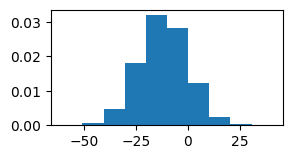

In [47]:
# trial simulation






plt.figure(figsize=(3,1.5))
plt.hist(Duration, density = True)
plt.show()



In [48]:
num_simulations = 10000
num_days = 252 

In [49]:
initial = 5615.35

Price range 5000 - 5100: Probability = 0.0000
Price range 5100 - 5200: Probability = 0.0000
Price range 5200 - 5300: Probability = 0.0000
Price range 5300 - 5400: Probability = 0.0007
Price range 5400 - 5500: Probability = 0.0450
Price range 5500 - 5600: Probability = 0.3624
Price range 5600 - 5700: Probability = 0.4797
Price range 5700 - 5800: Probability = 0.1082
Price range 5800 - 5900: Probability = 0.0040
Price range 5900 - 6000: Probability = 0.0000


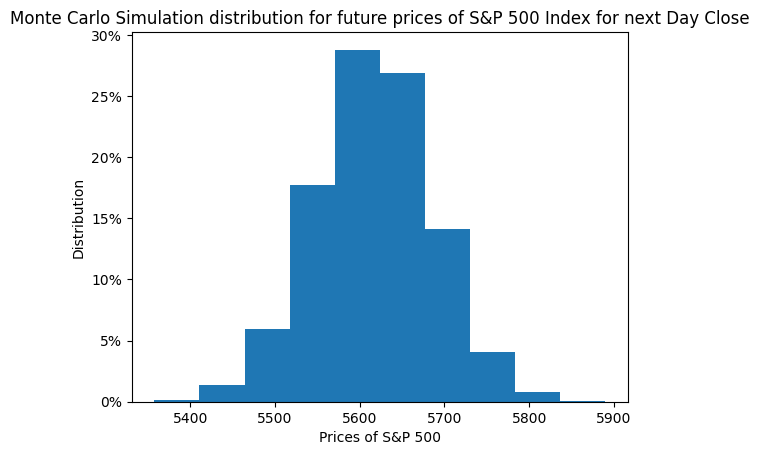

In [50]:
# Monte Carlo Model 


# Get historical daily returns and uses log to normailze return

returns = np.log(1+clipped['Close'].pct_change(-1))

# creates mean and std of returns

mu, sigma = returns.mean(), returns.std() 



number_days = 6048


num_simulations = 10000


 # check to see if you are right with the standard deviation multiplying at initial value (5615.35) ***************
sigma1 = sigma + 1   
simulations1= np.random.normal(( mu +1) * initial , sigma  * initial, num_simulations)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * .01)))

plt.xlabel('Prices of S&P 500')

plt.ylabel('Distribution')

plt.title('Monte Carlo Simulation distribution for future prices of S&P 500 Index for next Day Close')

# Define price rangers list to use for price ranges metrics and for probalilities of volatility (adding 2 probabilities to define) 

price_ranges = [ 
    ( 5000, 5100),
    (5100, 5200),
    (5200, 5300),
    (5300, 5400),
    (5400, 5500),
    (5500, 5600),
    (5600, 5700),
    (5700, 5800),
    (5800, 5900),
    (5900, 6000) ]







probabilities = []
for lower_bound, upper_bound in price_ranges:
    count_in_range = np.sum((simulations1 >= lower_bound) & (simulations1 <= upper_bound))
    probability_in_range = count_in_range / num_simulations
    probabilities.append((lower_bound, upper_bound, probability_in_range))

for lower_bound, upper_bound, probability in probabilities:
    print(f"Price range {lower_bound} - {upper_bound}: Probability = {probability:.4f}")







bins = np.linspace(simulations1.min(), simulations1.max(), 20)

counts, bin_edgges = np.histogram(simulations1, bins = bins)

probabilities = counts / num_simulations




plt.hist(simulations1)
plt.show()

In [52]:
#to obtain expected return

expected_return = np.mean(simulations1)
print(expected_return)

5616.339336735719


In [53]:
1.2538947277171246 / initial *100 


0.022329769786694053

In [54]:
max(simulations1)

5889.791894528072

In [55]:
min(simulations1)

5357.537333714549

In [56]:
# calculation for Value at Risk 

confidence_interval = 0.95

Var = np.percentile(simulations1,100*(1- confidence_interval)) 

#shows Value at risk for the confidence interval inputed 

print(-Var + initial)


112.58762326260148


In [57]:
# percentage value at risk 

112.41489591675418 / initial *100


2.001921445978508

In [58]:
# to Find Conditional Value at Risk Part 1 

Losses_beyond_Var = simulations1[simulations1 <= Var]

# Check if there are any losses beyond VaR
if len(Losses_beyond_Var) > 0:
    CVaRp = Losses_beyond_Var.mean()
else:
    CVaRp = np.nan

print(CVaRp)

5471.610151839355


In [59]:
# to Find Conditional Value at Risk Part 2 

Final_CVaR = -CVaRp + initial

print(Final_CVaR)

143.73984816064512


In [60]:
# percentage value at Risk 

140.38579889200446 / initial *100 

2.5000364873428094

In [61]:
returns.mean()

0.00021889233706300646

In [62]:
returns.mean()

0.00021889233706300646

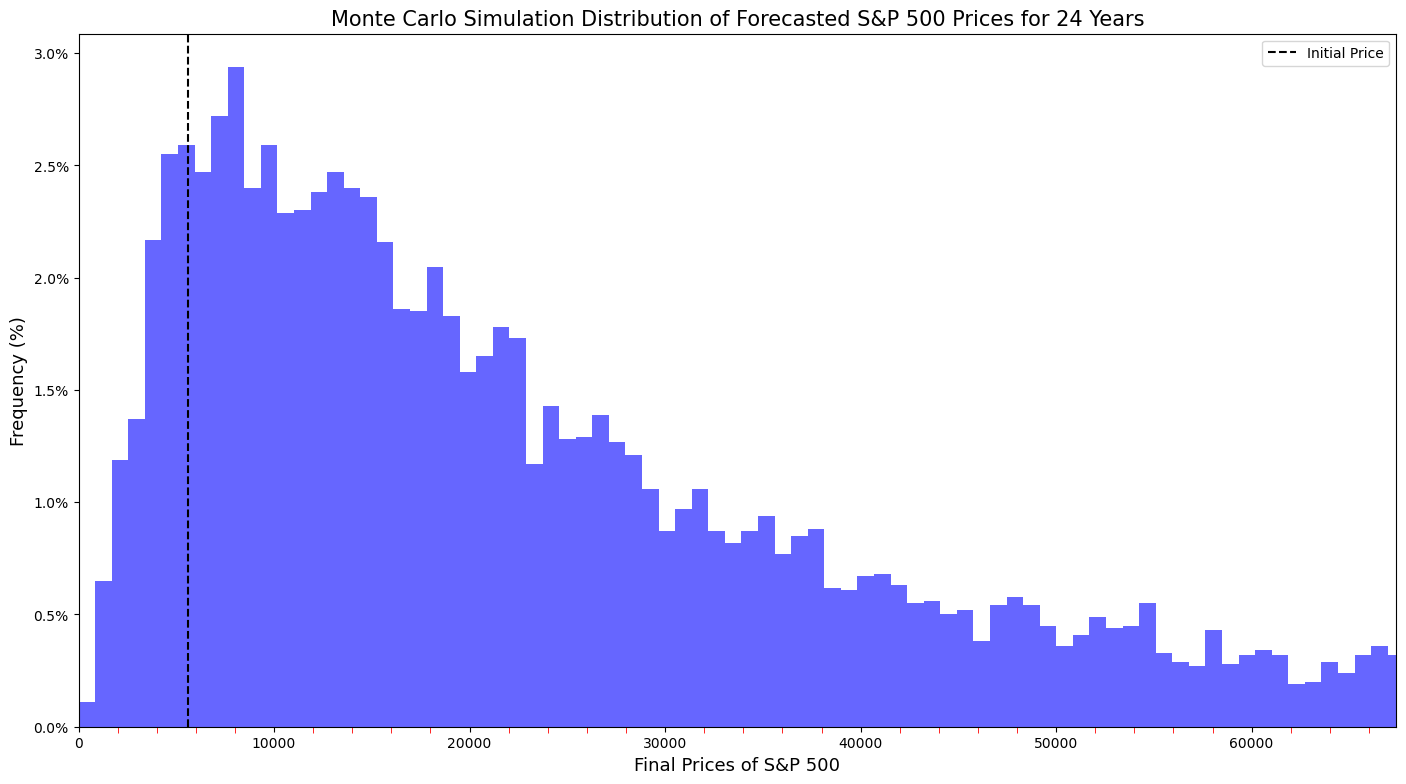

Simulation 1: 235.913% change from beginning to end
Simulation 2: -11.982% change from beginning to end
Simulation 3: 35.742% change from beginning to end
Simulation 4: 723.786% change from beginning to end
Simulation 5: 647.496% change from beginning to end

Probabilities of price ranges:
Price range 0.00 - 2807.68: 1.67%
Price range 0.00 - 5615.35: 8.41%
Price range 5615.35 - 15615.35: 29.39%
Price range 15615.35 - 25615.35: 20.10%
Price range 25615.35 - 35615.35: 12.70%
Price range 35615.35 - 45615.35: 7.79%
Price range 45615.35 - 55615.35: 5.63%
Price range 55615.35 - 65615.35: 3.42%
Price range 65615.35 - 75615.35: 2.82%
Price range 75615.35 - 85615.35: 2.09%
Price range 85615.35 - 95615.35: 1.26%
Price range 95615.35 - inf: 6.39%
Price range 0.00 - 32646.00: 67.45%
Price range 7243.21 - 72614.68: 76.31%
Price range 69508.68 - 106311.30: 6.18%
Price range 106311.30 - 143143.95: 2.55%
Price range 143143.95 - 179976.60: 1.24%
Price range 179976.60 - 216809.25: 0.57%
Price range 2168

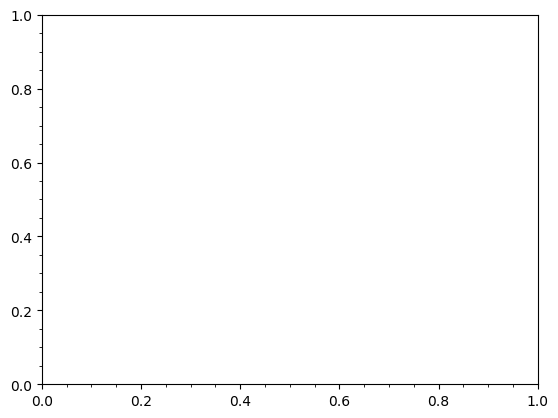

<class 'NameError'>: name 'drawdowns' is not defined

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator



# Assuming 'clipped' is a DataFrame with the historical 'Close' prices
# Calculate historical returns
returns = np.log(1 + clipped['Close'].pct_change(-1))
mu, sigma = returns.mean(), returns.std()

# Parameters for the simulation
initial_price = clipped['Close'].iloc[0]  # Use the last price as the initial price for simulation
num_days = 252 * 24  # 252 trading days per year, over 24 years
num_simulations = 10000  # Number of simulations

# Create an array to store the final prices
final_prices = np.zeros(num_simulations)

# Run the simulations
for i in range(num_simulations):
    # Simulate daily returns
    sim_returns = np.random.normal(mu, sigma, num_days)
    # Compute the price path using cumulative product
    sim_prices = initial_price * np.exp(np.cumsum(sim_returns))
    # Store the final price of this simulation
    final_prices[i] = sim_prices[-1]

# Plotting the histogram of final prices
plt.figure(figsize=(17, 9))
# Decrease the number of bins to increase bin width
counts, bins, patches = plt.hist(final_prices, bins=750, alpha=0.6, color='b', density=True)

# Convert counts to percentages
bin_width = bins[1] - bins[0]
percentages = counts / counts.sum() * 100

# Plot the histogram with percentage labels
plt.bar(bins[:-1], percentages, width=bin_width, alpha=0.6, color='b')

plt.axvline(initial_price, color='k', linestyle='--', label='Initial Price')

plt.xlabel('Final Prices of S&P 500', fontsize=13)
plt.ylabel('Frequency (%)', fontsize=13)
plt.title('Monte Carlo Simulation Distribution of Forecasted S&P 500 Prices for 24 Years', fontsize=15)
plt.legend()


ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator()) 
ax.tick_params(which='minor', length=4, color='r')

def to_percent(y, position):
    return f'{y:.1f}%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))



# Set x-axis limit if needed
plt.xlim(0, 12 * initial_price)  # Example: setting the limit to twice the initial price

plt.show()

# Calculate and print percentage changes from the initial price
percent_changes = ((final_prices - initial_price) / initial_price) * 100

# Print the percentage change for a few simulations as examples
for i in range(5):
    print(f"Simulation {i+1}: {percent_changes[i]:.3f}% change from beginning to end")



price_ranges = [ 
    (5000, 6000),
    (4000, 5000),
    (3000, 4000),
    (2000, 3000),
    (1000, 2000),
    (0, 1000),
    (6000, 8000),
    (8000, 10000),
    (10000, 12000),
    (12000, 14000) ]

plt.minorticks_on()
mean = 32646
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())

price_ranges = [
    (0, initial_price * 0.5),
    (0, initial_price), # 
    (initial_price, initial_price +10000),
    (initial_price +10000, initial_price +20000),
    (initial_price +20000, initial_price +30000),
    (initial_price +30000, initial_price +40000),
    (initial_price +40000, initial_price +50000),
    (initial_price +50000, initial_price +60000),
    (initial_price +60000, initial_price +70000),
    (initial_price +70000, initial_price +80000),
    (initial_price+80000, initial_price+90000),
    (initial_price + 90000, np.inf),

     (0,mean),
    (7243.21,72614.68),
    (mean + 36862.68 , mean + 36832.65 + 36832.65),
    ( mean + 36832.65 + 36832.65 ,mean + 36832.65 + 36832.65 + 36832.65),
    (mean + 36832.65 + 36832.65 + 36832.65, mean + 36832.65 + 36832.65+ 36832.65 + 36832.65),
    (mean + 36832.65 + 36832.65+ 36832.65 + 36832.65,mean + 36832.65 + 36832.65+ 36832.65 + 36832.65+ 36832.65),
    (mean + 36832.65 + 36832.65+ 36832.65 + 36832.65+ 36832.65,mean + 36832.65 + 36832.65+ 36832.65 + 36832.65+ 36832.65 + 36832.65), 
    (mean , mean + 36862.68)

    
    # Catch-all for anything above 4 times the initial price
]


# Calculate probabilities for each range
probabilities = []
for lower_bound, upper_bound in price_ranges:
    count_in_range = np.sum((final_prices >= lower_bound) & (final_prices < upper_bound))
    probability = count_in_range / num_simulations
    probabilities.append((lower_bound, upper_bound, probability))
print("\nProbabilities of price ranges:")
for lower_bound, upper_bound, probability in probabilities:
    print(f"Price range {lower_bound:.2f} - {upper_bound:.2f}: {probability:.2%}")


expected_final_price = np.mean(final_prices)
expected_return = ((expected_final_price - initial_price) / initial_price) * 100

print(f"\nExpected final price: {expected_final_price:.2f}")
print(f"Expected return: {expected_return:.2f}%")


# Calculate drawdowns
peak = np.maximum.accumulate(sim_prices)
drawdown = (sim_prices - peak) / peak
max_drawdown = np.min(drawdown)  # Most negative drawdown
drawdown[i] = max_drawdown

drawdown_bins = [
    (-1, -0.75),
    (-0.75, -0.50),
    (-0.50, -0.25),
    (-0.25, 0),
    (0, 0.1) ]

# Calculate the maximum drawdown
max_drawdown = np.min(drawdowns)
print(f"\nMaximum Drawdown: {max_drawdown:.2%}")

# Calculate probabilities for each drawdown range
drawdown_probabilities = []
for lower_bound, upper_bound in drawdown_bins:
    count_in_range = np.sum((drawdowns >= lower_bound) & (drawdowns < upper_bound))
    probability = count_in_range / num_simulations
    drawdown_probabilities.append((lower_bound, upper_bound, probability))



# Print the probabilities of drawdown ranges
print("\nProbabilities of drawdown ranges:")
for lower_bound, upper_bound, probability in drawdown_probabilities:
    print(f"Drawdown range {lower_bound:.2f} - {upper_bound:.2f}: {probability:.2%}")

max_drawdown_threshold = -0.
max_drawdowns = np.zeros(num_simulations)

max_drawdowns[i] = np.min(drawdowns)

# Calculate the probability of exceeding the maximum drawdown threshold
exceedances = np.sum(max_drawdowns <= max_drawdown_threshold)
probability_exceeding_max_drawdown = exceedances / num_simulations

print(f"Probability of exceeding a maximum drawdown of {max_drawdown_threshold*100:.2f}%: {probability_exceeding_max_drawdown:.2%}")


In [64]:
return_ranges = [
    (-50, -25),
    (-25, 0),
    (0, 75),
    
    (75, 150),
    (150, 225),
    (225,300),
    (300,375),
    (375,450),
    (450,525),
    (525,600),
    (600, 700),(700, 800),(800, 900),(900, 1000)
    
]

# Calculate probabilities for each return range
return_probabilities = []
for lower_bound, upper_bound in return_ranges:
    count_in_range = np.sum((percent_changes >= lower_bound) & (percent_changes < upper_bound))
    probability = count_in_range / num_simulations
    return_probabilities.append((lower_bound, upper_bound, probability))

# Print the probabilities of return ranges
print("\nProbabilities of return ranges:")
for lower_bound, upper_bound, probability in return_probabilities:
    print(f"Return range {lower_bound:.2f}% - {upper_bound:.2f}%: {probability:.2%}")



Probabilities of return ranges:
Return range -50.00% - -25.00%: 2.60%
Return range -25.00% - 0.00%: 4.14%
Return range 0.00% - 75.00%: 12.98%
Return range 75.00% - 150.00%: 11.93%
Return range 150.00% - 225.00%: 10.57%
Return range 225.00% - 300.00%: 8.82%
Return range 300.00% - 375.00%: 6.87%
Return range 375.00% - 450.00%: 5.78%
Return range 450.00% - 525.00%: 4.58%
Return range 525.00% - 600.00%: 3.98%
Return range 600.00% - 700.00%: 4.08%
Return range 700.00% - 800.00%: 3.31%
Return range 800.00% - 900.00%: 2.90%
Return range 900.00% - 1000.00%: 2.16%


In [65]:
std_dev_returns = np.std(sim_returns)
print(f"\nStandard Deviation of Simulated Returns: {std_dev_returns:.5f}")

# Calculate the standard deviation of final prices
std_dev_final_prices = np.std(final_prices)
print(f"Standard Deviation of Final Prices: {std_dev_final_prices:.2f}")


Standard Deviation of Simulated Returns: 0.01241
Standard Deviation of Final Prices: 40052.52


In [66]:
np.mean(final_prices) 

33803.60844919

In [67]:
# 1 SD +

39928.95 + 32685.73 


72614.68

In [68]:
# 1 SD - 

39928.95 - 32685.73


7243.2199999999975

In [69]:
# 2 SD + 

39928.95 *2 + 32685.73



112543.62999999999

In [70]:
# 2 SD - 

0 

0

In [71]:
#3 SD + 

39928.95 *3 + 32685.73



152472.58

In [72]:
#3 SD - 
0 

0

In [73]:
# 4 SD + 

39928.95 *4 + 32685.73


192401.53

In [74]:
#5 SD 
39928.95 + 192401.53

232330.47999999998

In [75]:
# 6 SD 

39928.95 +232330.47999999998 

272259.43

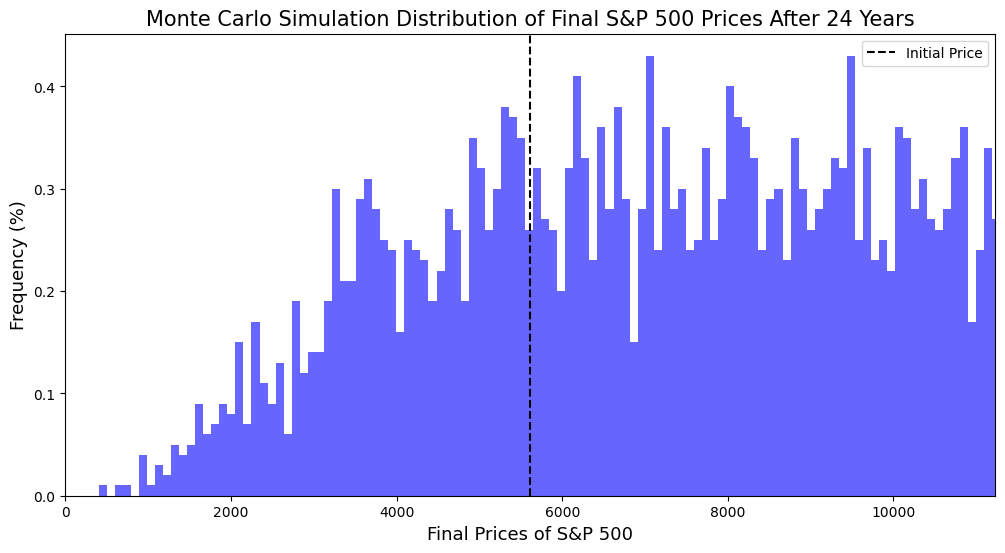

Simulation 1: 63.20% change from beginning to end
Simulation 2: 621.25% change from beginning to end
Simulation 3: 202.21% change from beginning to end
Simulation 4: 409.04% change from beginning to end
Simulation 5: -31.30% change from beginning to end

Average percentage change: 493.99%

Maximum Drawdown: -64.85%

Probabilities of drawdown ranges:


<class 'NameError'>: name 'drawdown_probabilities' is not defined

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'clipped' is a DataFrame with the historical 'Close' prices
# Calculate historical returns
returns = np.log(1 + clipped['Close'].pct_change(-1))
mu, sigma = returns.mean(), returns.std()

# Parameters for the simulation
initial_price = clipped['Close'].iloc[0]  # Use the last price as the initial price for simulation
num_days = 252 * 24  # 252 trading days per year, over 24 years
num_simulations = 10000  # Number of simulations

# Create an array to store the final prices
final_prices = np.zeros(num_simulations)
drawdowns = np.zeros(num_simulations)

# Run the simulations
for i in range(num_simulations):
    # Simulate daily returns
    sim_returns = np.random.normal(mu, sigma, num_days)
    # Compute the price path using cumulative product
    sim_prices = initial_price * np.exp(np.cumsum(sim_returns))
    # Store the final price of this simulation
    final_prices[i] = sim_prices[-1]

# Plotting the histogram of final prices
plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(final_prices, bins=10000, alpha=0.6, color='b', density=True)

# Convert counts to percentages
bin_width = bins[1] - bins[0]
percentages = counts / counts.sum() * 100

# Plot the histogram with percentage labels
plt.bar(bins[:-1], percentages, width=bin_width, alpha=0.6, color='b')

plt.axvline(initial_price, color='k', linestyle='--', label='Initial Price')

plt.xlabel('Final Prices of S&P 500', fontsize=13)
plt.ylabel('Frequency (%)', fontsize=13)
plt.title('Monte Carlo Simulation Distribution of Final S&P 500 Prices After 24 Years', fontsize=15)
plt.legend()

# Set x-axis limit
plt.xlim(0, 2 * initial_price)  # Example: setting the limit to twice the initial price

plt.show()

# Calculate and print percentage changes from the initial price
percent_changes = ((final_prices - initial_price) / initial_price) * 100

# Print the percentage change for a few simulations as examples
for i in range(5):
    print(f"Simulation {i+1}: {percent_changes[i]:.2f}% change from beginning to end")

# Calculate and print the average percentage change
average_percent_change = np.mean(percent_changes)
print(f"\nAverage percentage change: {average_percent_change:.2f}%")





# Calculate drawdowns
peak = np.maximum.accumulate(sim_prices)
drawdown = (sim_prices - peak) / peak
max_drawdown = np.min(drawdown)  # Most negative drawdown
drawdowns[i] = max_drawdown


# Calculate the maximum drawdown
max_drawdown = np.min(drawdowns)
print(f"\nMaximum Drawdown: {max_drawdown:.2%}")


# Print the probabilities of drawdown ranges
print("\nProbabilities of drawdown ranges:")
for lower_bound, upper_bound, probability in drawdown_probabilities:
    print(f"Drawdown range {lower_bound:.2f} - {upper_bound:.2f}: {probability:.2%}")

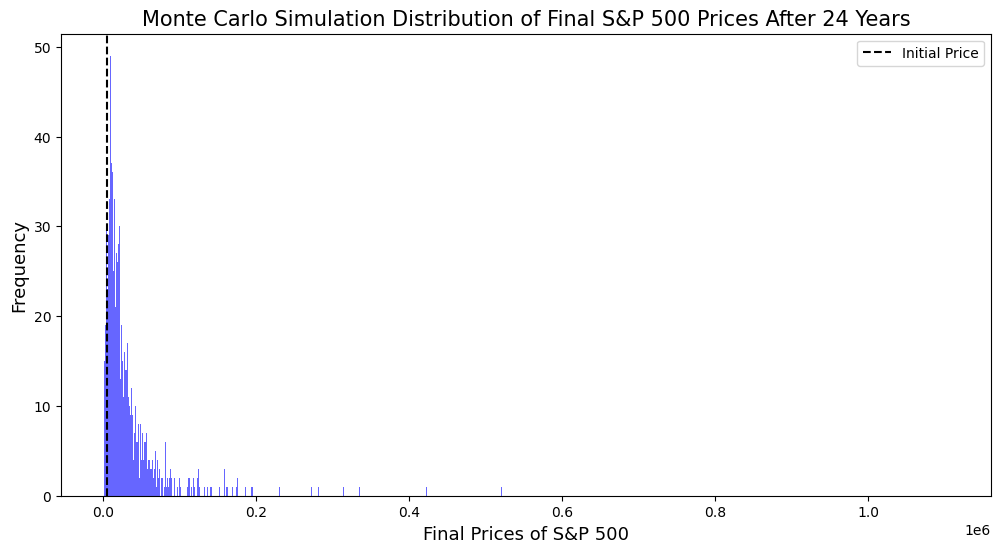

Simulation 1: 164.92% change from beginning to end
Simulation 2: 363.53% change from beginning to end
Simulation 3: 1016.03% change from beginning to end
Simulation 4: 156.31% change from beginning to end
Simulation 5: 70.87% change from beginning to end

Average percentage change: 483.68%


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


# Assuming 'clipped' is a DataFrame with the historical 'Close' prices
# Calculate historical returns
returns = np.log(1 + clipped['Close'].pct_change(-1))
mu, sigma = returns.mean(), returns.std()

# Parameters for the simulation
initial_price = clipped['Close'].iloc[0]  # Use the last price as the initial price for simulation
num_days = 252 * 24  # 252 trading days per year, over 24 years
num_simulations = 10000  # Number of simulations

# Create an array to store the final prices
final_prices = np.zeros(num_simulations)

# Run the simulations
for i in range(num_simulations):
    # Simulate daily returns
    sim_returns = np.random.normal(mu, sigma, num_days)
    # Compute the price path using cumulative product
    sim_prices = initial_price * np.exp(np.cumsum(sim_returns))
    # Store the final price of this simulation
    final_prices[i] = sim_prices[-1]



# Plotting the histogram of final prices
plt.figure(figsize=(12, 6))
plt.hist(final_prices, bins=10000, alpha=0.6, color='b')
plt.axvline(initial_price, color='k', linestyle='--', label='Initial Price')





plt.xlabel('Final Prices of S&P 500', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Monte Carlo Simulation Distribution of Final S&P 500 Prices After 24 Years', fontsize=15)
plt.legend()
plt.show()




# Calculate and print percentage changes from the initial price
percent_changes = ((final_prices - initial_price) / initial_price) * 100

# Print the percentage change for a few simulations as examples
for i in range(5):
    print(f"Simulation {i+1}: {percent_changes[i]:.2f}% change from beginning to end")

# Calculate and print the average percentage change
average_percent_change = np.mean(percent_changes)
print(f"\nAverage percentage change: {average_percent_change:.2f}%")


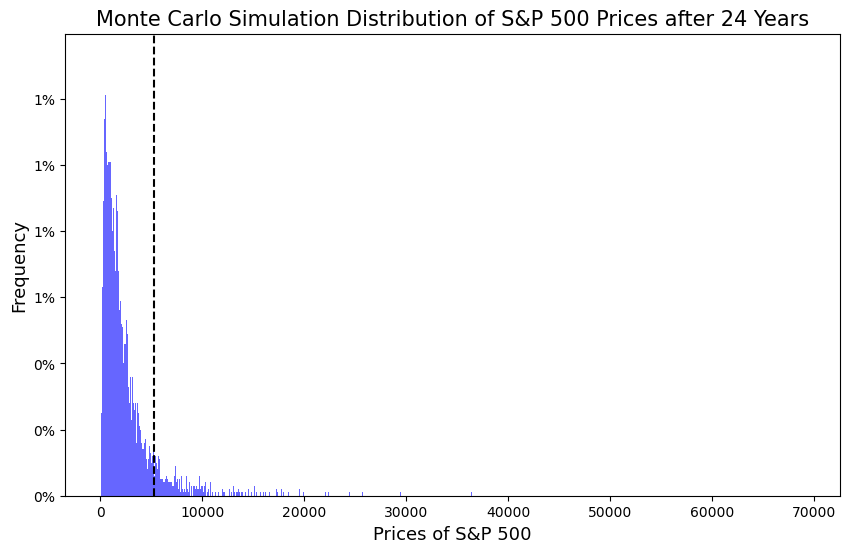


Average percentage change: -51.36%


In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'clipped' is a DataFrame with the historical 'Close' prices
# Get historical daily returns
clipped['Pct_Change'] = clipped['Close'].pct_change(-1)
initial_price = 5316
final_price = clipped['Close'].iloc[-1]

# Calculate the historical percentage change
historical_return = (final_price - initial_price) / initial_price

# Parameters for the simulation
num_days = 252 * 24  # 252 trading days per year, over 24 years
num_simulations = 10000  # Number of simulations

# Create an array to store the final prices
final_prices = np.zeros(num_simulations)

# Run the simulations
for i in range(num_simulations):
    # Simulate daily returns based on historical percentage change
    daily_returns = np.random.normal(historical_return / num_days, sigma, num_days)
    # Compute the price path using cumulative product of (1 + daily_returns)
    sim_prices = initial_price * (1 + daily_returns).cumprod()
    final_prices[i] = sim_prices[-1]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(final_prices, bins=2500 , alpha=0.6, color='b')
plt.axvline(initial_price, color='k', linestyle='--')
plt.xlabel('Prices of S&P 500', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * .01)))

plt.title('Monte Carlo Simulation Distribution of S&P 500 Prices after 24 Years', fontsize=15)
plt.show()

# Calculate and print the percentage change for each simulation
percent_changes = ((final_prices - initial_price) / initial_price) * 100

# Print the percentage change for a few simulations as examples
for i in range(10,000):
    print(f"Simulation {i+1}: {percent_changes[i]:.2f}% change from beginning to end")



# Calculate and print the average percentage change
average_percent_change = np.mean(percent_changes)
print(f"\nAverage percentage change: {average_percent_change:.2f}%")


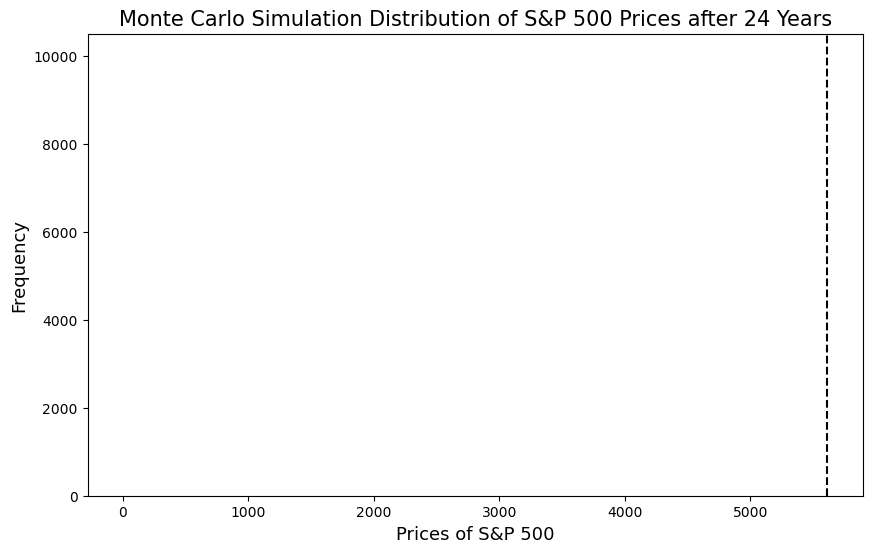

Simulation 1: -100.00% change from beginning to end
Simulation 2: -100.00% change from beginning to end
Simulation 3: -100.00% change from beginning to end
Simulation 4: -100.00% change from beginning to end
Simulation 5: -100.00% change from beginning to end

Average percentage change: -100.00%


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'clipped' is a DataFrame with the historical 'Close' prices
# Get historical daily returns and use log to normalize returns
returns = np.log(1 + clipped['Close'].pct_change())

# Calculate mean and standard deviation of returns
mu, sigma = returns.mean(), returns.std()

# Parameters for the simulation
initial_price = 5615.35  # Initial price of S&P 500
num_days = 252 * 24  # 252 trading days per year, over 24 years
num_simulations = 10000  # Number of simulations

# Create an array to store the final prices
final_prices = np.zeros(num_simulations)



# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(final_prices, bins=50, alpha=0.6, color='b')
plt.axvline(initial_price, color='k', linestyle='--')
plt.xlabel('Prices of S&P 500', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Monte Carlo Simulation Distribution of S&P 500 Prices after 24 Years', fontsize=15)
plt.show()

# Calculate and print the percentage change for each simulation
percent_changes = ((final_prices - initial_price) / initial_price) * 100

# Print the percentage change for a few simulations as examples
for i in range(5):
    print(f"Simulation {i+1}: {percent_changes[i]:.2f}% change from beginning to end")

# Calculate and print the average percentage change
average_percent_change = np.mean(percent_changes)
print(f"\nAverage percentage change: {average_percent_change:.2f}%")




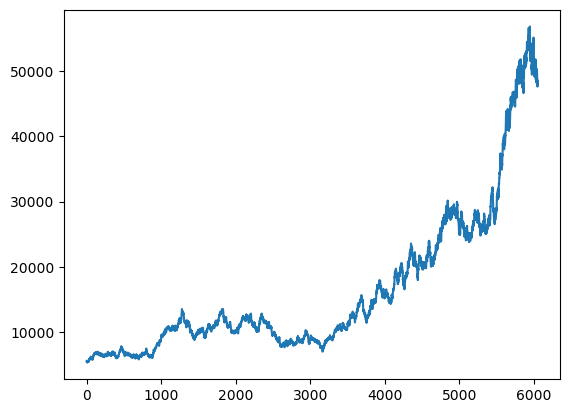

In [80]:


# Get historical daily returns and uses log to normailze return

returns = np.log(1+clipped['Close'].pct_change(-1))

# creates mean and std of returns

mu, sigma = returns.mean(), returns.std() 

#create random number from normal distribution of Returns

sim_returns = np.random.normal(mu, sigma,6048)

initial = 5615.35

sim_prices = initial * (sim_returns +1).cumprod()

plt.plot(sim_prices)

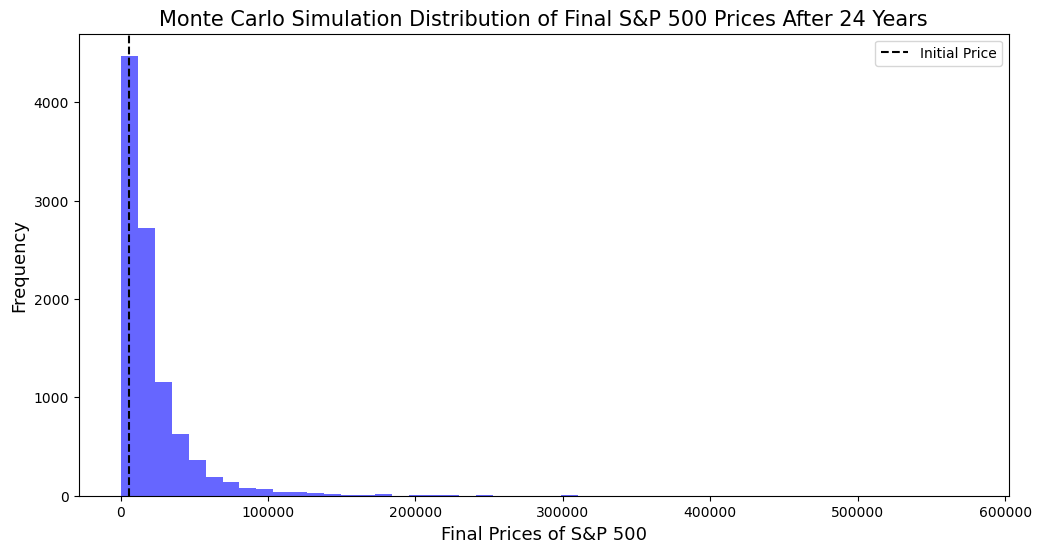

Simulation 1: 1262.99% change from beginning to end
Simulation 2: 457.30% change from beginning to end
Simulation 3: 98.47% change from beginning to end
Simulation 4: 2164.25% change from beginning to end
Simulation 5: -11.11% change from beginning to end

Average percentage change: 283.82%


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'clipped' is a DataFrame with the historical 'Close' prices
# Calculate historical returns
returns = np.log(1 + clipped['Close'].pct_change(-1))
mu, sigma = returns.mean(), returns.std()

# Parameters for the simulation
initial_price = 5615.35  # Initial price of S&P 500
num_days = 252 * 24  # 252 trading days per year, over 24 years
num_simulations = 10000  # Number of simulations

# Create an array to store the final prices
final_prices = np.zeros(num_simulations)

# Run the simulations
for i in range(num_simulations):
    # Simulate daily returns
    sim_returns = np.random.normal(mu, sigma, num_days)
    # Compute the price path using cumulative product
    sim_prices = initial_price * (1 + sim_returns).cumprod()
    # Store the final price of this simulation
    final_prices[i] = sim_prices[-1]

# Plotting the histogram of final prices
plt.figure(figsize=(12, 6))
plt.hist(final_prices, bins=50, alpha=0.6, color='b')
plt.axvline(initial_price, color='k', linestyle='--', label='Initial Price')
plt.xlabel('Final Prices of S&P 500', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Monte Carlo Simulation Distribution of Final S&P 500 Prices After 24 Years', fontsize=15)
plt.legend()
plt.show()

# Calculate and print percentage changes from the initial price
percent_changes = ((final_prices - initial_price) / initial_price) * 100

# Print the percentage change for a few simulations as examples
for i in range(5):
    print(f"Simulation {i+1}: {percent_changes[i]:.2f}% change from beginning to end")

# Calculate and print the average percentage change
average_percent_change = np.mean(percent_changes)
print(f"\nAverage percentage change: {average_percent_change:.2f}%")


In [82]:
for i in range(num_simulations):
    # Simulate daily returns
    sim_returns = np.random.normal(mu, sigma, num_days)
    # Compute the price path using cumulative product
    sim_prices = initial_price * (1 + sim_returns).cumprod()
    # Store the final price of this simulation
    final_prices[i] = sim_prices[-1]

# Calculate percentage changes from the initial price
percent_changes = ((final_prices - initial_price) / initial_price) * 100

# Calculate the average return
average_return = np.mean(percent_changes)

print(f"Average return over {num_simulations} simulations: {average_return:.2f}%")

# Calculate VaR and CVaR
confidence_level = 0.95
percentile = (1 - confidence_level) * 100

# VaR at the desired percentile
var = np.percentile(percent_changes, percentile)

# CVaR is the average of the percentage changes that are less than or equal to VaR
cvar = np.mean([change for change in percent_changes if change <= var])

print(f"Average return over {num_simulations} simulations: {average_return:.2f}%")
print(f"Value at Risk (VaR) at {confidence_level*100:.0f}% confidence level: {var:.2f}%")
print(f"Conditional Value at Risk (CVaR) at {confidence_level*100:.0f}% confidence level: {cvar:.2f}%")

Average return over 10000 simulations: 274.11%
Average return over 10000 simulations: 274.11%
Value at Risk (VaR) at 95% confidence level: -52.04%
Conditional Value at Risk (CVaR) at 95% confidence level: -66.53%


Text(0.5, 1.0, 'Forecasted S&P 500 ETF Price Paths for 24 Years(Approx. Historical Data Time Period) ')

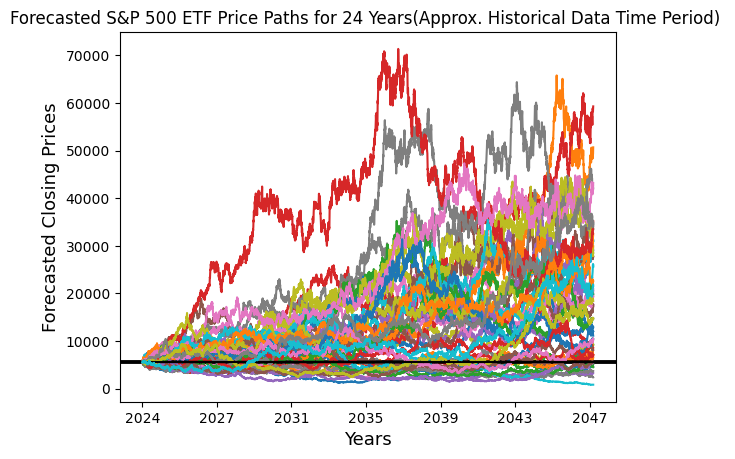

In [83]:
 for i in range(50):
    sim_returns = np.random.normal(mu, sigma,num_days)
    sim_prices = initial * (sim_returns +1).cumprod()
    plt.axhline(initial, c='k')
    plt.plot(sim_prices)

plt.xlabel('Years', fontsize = 13)

plt.ylabel('Forecasted Closing Prices', fontsize = 13 )

#creates time span based off historical Return time span 

num_days = 252*24

# creates date range based off of my Historical Returns Date 
date_range = pd.date_range(start=clipped.index.max() + pd.Timedelta(days=1), periods=num_days, freq='B')

#uses lambda to create a function that formats x axis in years 
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x // 252) + (2023 if date_range[0].year == 2023 else date_range[0].year)}"))
percent_changes = []

final_price = sim_prices[-1]
percent_change = ((final_price - initial) / initial) * 100
percent_changes.append(percent_change)





           
plt.title('Forecasted S&P 500 ETF Price Paths for 24 Years(Approx. Historical Data Time Period) ')

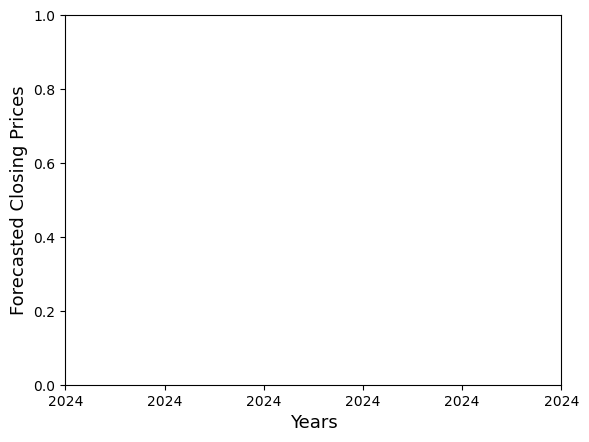

<class 'TypeError'>: enumerate() takes at most 2 arguments (3 given)

In [116]:
 for i in range(10000):
    sim_returns = np.random.normal(mu, sigma,num_days)
    sim_prices = initial * (sim_returns +1).cumprod()
    plt.axhline(initial, c='k')
    plt.plot(sim_prices)

plt.xlabel('Years', fontsize = 13)

plt.ylabel('Forecasted Closing Prices', fontsize = 13 )

#creates time span based off historical Return time span 

num_days = 252*24

# creates date range based off of my Historical Returns Date 
date_range = pd.date_range(start=clipped.index.max() + pd.Timedelta(days=1), periods=num_days, freq='B')

#uses lambda to create a function that formats x axis in years 
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x // 252) + (2023 if date_range[0].year == 2023 else date_range[0].year)}"))
percent_changes = []

final_price = sim_prices[-1]
percent_change = ((final_price - initial) / initial) * 100
percent_changes.append(percent_change)




for i, change in enumerate(percent_changes, 10,000):
    print(f"Simulation {i}: {change:.2f}% change from beginning to end")

average_percent_change = np.mean(percent_changes)
print(f"\nAverage percentage change: {average_percent_change:.2f}%")

           
plt.title('Forecasted S&P 500 ETF Price Paths for 24 Years(Approx. Historical Data Time Period) ')

In [117]:
# calculation for Value at Risk 

confidence_interval = 0.95

Var = np.percentile(sim_returns,100*(1- confidence_interval)) 

#shows Value at risk for the confidence interval inputed 

print(-Var + initial)


5615.370072809511


### Monte Carlo Model 

num_simulations = 10000


Mean = clipped['Close'].mean()

Std  = clipped['Close'].std()


simulations = np.random.normal(Mean ,Std, num_simulations)

plt.hist(simulations, density = True) 

plt.show()

In [118]:
print(mu)

0.00021889233706300646


In [119]:
print(sigma * 100)

1.2285041955133658


In [120]:
import datetime as dt 

import numpy as np 


meanReturns = returns.mean()


endDate = dt.datetime.now()

startDate = endDate - dt.timedelta (days =300)





In [121]:
covMatrix = returns.cov(series2)



series2 = clippedindex


<class 'NameError'>: name 'series2' is not defined

In [122]:
print(returns)

Date
2024-07-12    0.005502
2024-07-11   -0.008802
2024-07-10    0.010156
2024-07-09    0.000741
2024-07-08    0.001016
                ...   
2000-01-07    0.026730
2000-01-06    0.000955
2000-01-05    0.001920
2000-01-04   -0.039099
2000-01-03         NaN
Name: Close, Length: 6170, dtype: float64


In [123]:
print(clipped)

              Close  Daily Returns as %  30 day Mean of Daily Returns %  \
Date                                                                      
2024-07-12  5615.35                0.55                             NaN   
2024-07-11  5584.54               -0.88                             NaN   
2024-07-10  5633.91                1.02                             NaN   
2024-07-09  5576.98                0.07                             NaN   
2024-07-08  5572.85                0.10                             NaN   
...             ...                 ...                             ...   
2000-01-07  1441.47                2.71                       -0.129333   
2000-01-06  1403.45                0.10                       -0.024667   
2000-01-05  1402.11                0.19                       -0.019667   
2000-01-04  1399.42               -3.83                       -0.113000   
2000-01-03  1455.22                 NaN                             NaN   

            30 day Std o

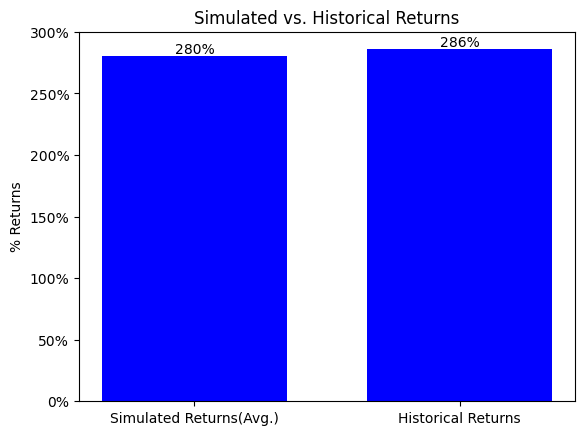

In [145]:
import matplotlib.pyplot as plt

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator,FormatStrFormatter)
import matplotlib.ticker as mtick
from pylab import rcParams







# compares Simulated Average Return to Historical Returns 




A = [280.23, 285.88]

fig, ax = plt.subplots()

X=['Simulated Returns(Avg.)', 'Historical Returns']

hbars = ax.bar(X, A, color = "b", width =.7)

ax.bar_label(hbars,fmt='%.0f%%')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())


plt.ylabel('% Returns')

plt.title('Simulated vs. Historical Returns')

#
plt.show()